# Check list 

###### Step 1.Loading data (impelement successfully)
###### Step 2.Training  (impelement successfully)
    Step 2.1 code for training (implement successfully)
    Step 2.2 successful training (implement successfully)
###### Step 3.module Evaluation  (impelement successfully)
    Step 3.1explain your experimental design (implement successfully)
    Step 3.2: document your evaluation results (implement successfully)
###### Extra  (implement successfully)

# Step 1 . Loading  data 

## 1.1 Importing the libraries

In [200]:
#Numpy 
import numpy as np

#Datafram operations
import pandas as pd

#Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.neighbors import KNeighborsClassifier #KNN

## 1.2 Importing dataset

In [201]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data = train_df.append(test_df)# The entire data = train + test


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


## 1.3 Feature Engineering 

In [202]:
#Calculate the missing data
data = data.fillna(np.nan)
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

let's drop some columns which don't have many missing values

In [203]:
drop_elements = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked']
train_df.drop(drop_elements, axis = 1, inplace = True)
test_df.drop(drop_elements, axis = 1, inplace = True)

### 1.3.1  Processing Fare 

In [204]:
data[data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


fill the missing fare value with the median, it will not change the distribution with only one value


In [205]:
data['Fare'] = data['Fare'].fillna(train_df['Fare'].median())

In [206]:
#Making Bins
data['FareBin'] = pd.qcut(data['Fare'], 5)

label = LabelEncoder()
data['FareBin_Code'] = label.fit_transform(data['FareBin'])

train_df['FareBin_Code'] = data['FareBin_Code'][:891]
test_df['FareBin_Code'] = data['FareBin_Code'][891:]

train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

### 1.3.2 Processing titles

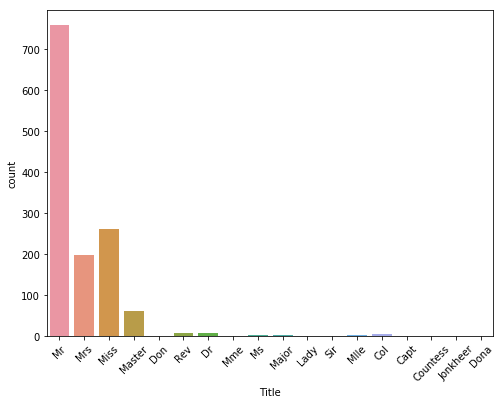

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Sir           1
Mme           1
Lady          1
Capt          1
Dona          1
Jonkheer      1
Don           1
Countess      1
Name: Title, dtype: int64

In [207]:
data['Title'] = data['Name']

#extract title from name
for name_string in data['Name']:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=True)

#Distribution of title 
plt.figure(figsize = (8,6))
sns.countplot(x = "Title", data = data)
plt.xticks(rotation = '45')
plt.show()

data['Title'].value_counts()

In [208]:
# replaing rare titles with more common ones
title_changes = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

data.replace({'Title':title_changes},inplace = True)
titles = ['Dr','Master','Miss','Mr','Mrs','Rev']


### 1.3.3 Processing Age

True


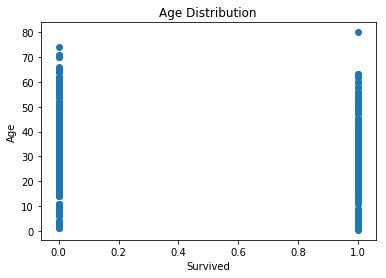

In [209]:
print(data['Age'].isnull().values.any())
plt.scatter(data['Survived'], data['Age'])
plt.ylabel("Age") 
plt.xlabel("Survived") 
plt.title("Age Distribution")
plt.show()

In [210]:
for title in titles:
    age_to_impute = data.groupby('Title')['Age'].median()[titles.index(title)]
    data.loc[(data['Age'].isnull()) & (data['Title'] == title), 'Age'] = age_to_impute
    
# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Age'] = data['Age'][:891]
test_df['Age'] = data['Age'][891:]

# Dropping Title feature
data.drop('Title', axis = 1, inplace = True)

In [211]:
data['AgeBin'] = pd.qcut(data['Age'], 4)

label = LabelEncoder()
data['AgeBin_Code'] = label.fit_transform(data['AgeBin'])

train_df['AgeBin_Code'] = data['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = data['AgeBin_Code'][891:]

train_df.drop(['Age'], 1, inplace=True)
test_df.drop(['Age'], 1, inplace=True)

### 1.3.4 Processing Family size

In [212]:
#Adding family size a feature: 
data['Family_Size'] = data['Parch'] + data['SibSp']

#Substituting age Values in Train_df and Test_df:
train_df['Family_Size'] = data['Family_Size'][:891]
test_df['Family_Size'] = data['Family_Size'][891:]

### 1.3.5 Processing  Sex 

In [213]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [214]:
train_df.head(20)

,Survived,Pclass,Sex,FareBin_Code,AgeBin_Code,Family_Size
0,0,3,0,0,0,1
1,1,1,1,4,3,1
2,1,3,1,1,1,0
3,1,1,1,4,2,1
4,0,3,0,1,2,0
5,0,3,0,1,1,0
6,0,1,0,4,3,0
7,0,3,0,2,0,4
8,1,3,1,2,1,2
9,1,2,1,3,0,1


# Step 2 . Training

## 2.1 code for training

###  Feature scaling

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df.drop('Survived', axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [216]:
scaled = scaler.transform(train_df.drop('Survived', axis =1))

In [217]:
df_scaled = pd.DataFrame(scaled, columns = train_df.columns.drop('Survived'))

In [218]:
X = df_scaled
y = train_df['Survived']
X_test = test_df.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 2.2 successful training 

### Using KNN Model

In [219]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [220]:
y_pred = knn.predict(X_test)

# Step 3 . Model Evaluation

## 3.1 Explain experimental design

###  Confusion matrix

In [221]:
#Accuracy, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)

TP: 42
TN: 106
FP: 4
FN: 27


### Classification Accuracy

In [222]:
print ((TP+TN) / float(TP+TN+FN+FP))
accuracy = accuracy_score(y_test,y_pred)

0.8268156424581006


### Classification Error

In [223]:
print ((FP+FN) / float(TP+TN+FN+FP))
error = 1-accuracy_score(y_test, y_pred)

0.17318435754189945


###  ROC Curves

In [224]:
from sklearn import metrics
def plot_roc_curve(fpr, tpr, label= None):
    threshold = 0.5
    plt.figure(figsize = (12,5))
    plt.plot(fpr, tpr, label = label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()   

## 3.2 Evaluation results

### Result of Confusion matrix and accuracy

In [225]:
print(confusion)
print("Accuracy: "+ str(accuracy))
print("Error: "+ str(error))
print(classification_report(y_test, y_pred))  

[[106   4]
 [ 27  42]]
Accuracy: 0.8268156424581006
Error: 0.17318435754189943
             precision    recall  f1-score   support

          0       0.80      0.96      0.87       110
          1       0.91      0.61      0.73        69

avg / total       0.84      0.83      0.82       179



### Result of ROC curve 

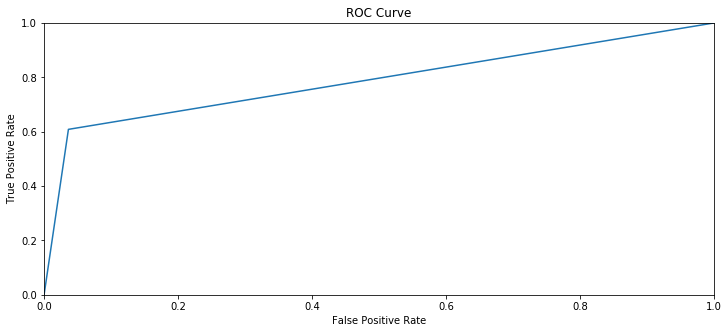

AUC Score:
 0.7861660079051384


In [226]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)
plt.show()
print("AUC Score:\n",metrics.roc_auc_score(y_test, y_pred))

# Extra

### Train new models via KNN

In [227]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1,50)
k_scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 4, scoring='accuracy')
    print("k = " + str(k) + ", score = " + str(scores) + ", mean = " +  str(scores.mean())+"\n"+"Accuracy: "+str(accuracy_score(y_test,y_pred)) 
          +", AUC Score:",metrics.roc_auc_score(y_test, y_pred))
    k_scores.append(scores.mean())

k = 1, score = [0.69196429 0.73542601 0.6981982  0.71621622], mean = 0.7104511772743275
Accuracy: 0.8268156424581006, AUC Score: 0.7861660079051384
k = 2, score = [0.74107143 0.80269058 0.79279279 0.8018018 ], mean = 0.7845891515314161
Accuracy: 0.8268156424581006, AUC Score: 0.7861660079051384
k = 3, score = [0.78571429 0.81165919 0.75225225 0.76126126], mean = 0.7777217480132278
Accuracy: 0.8268156424581006, AUC Score: 0.7861660079051384
k = 4, score = [0.77678571 0.8206278  0.78828829 0.8018018 ], mean = 0.796875901766597
Accuracy: 0.8268156424581006, AUC Score: 0.7861660079051384
k = 5, score = [0.79017857 0.8206278  0.82432432 0.82882883], mean = 0.815989881818077
Accuracy: 0.8268156424581006, AUC Score: 0.7861660079051384
k = 6, score = [0.79910714 0.8206278  0.78828829 0.81531532], mean = 0.8058346372878323
Accuracy: 0.8268156424581006, AUC Score: 0.7861660079051384
k = 7, score = [0.76785714 0.81165919 0.8018018  0.81981982], mean = 0.8002844893259692
Accuracy: 0.82681564245810

### Compare different models

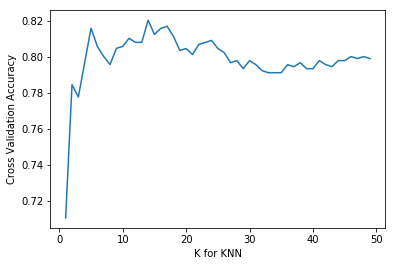

In [228]:
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Cross Validation Accuracy')
plt.show()